# Infilling Human Antibody Sequences using Sapiens

Try out this notebook in your browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Merck/Sapiens/main?labpath=notebooks%2F01_sapiens_antibody_infilling.ipynb)

In [4]:
import sapiens

/Users/prihodad/miniforge3/envs/sapiens-huggingface/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Infilling an antibody sequence

Positions marked with * or X will be infilled with the most likely human residues, given the rest of the sequence

In [5]:
seq = '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_masked(seq, 'H'))# H or L for Heavy or Light (kappa and lambda are using the same model)
print()

**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS
QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS





Predictions can even be made in CDR3 regions

In [6]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_masked(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYGDGYYFDYWGQGTTVTVSS



Use `predict_best_score` to humanize all positions, not just masks:

In [7]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(sapiens.predict_best_score(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTNYYMHWVRQAPGQGLEWMGWINPSNGGTNFAQKFQGRVTLTTDTSTTTAYMELRSLRSDDTAVYYCARRDYGDGYYFDYWGQGTLVTVSS



Hundreds of sequences per second can be processed:

In [8]:
%%timeit

sapiens.predict_masked(
    '******SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS',
    'H'  # H or L (kappa and lambda are using the same model)
)

5.6 ms ± 159 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Suggesting mutations

Scores are given both for residues that are masked and that are present.  
When inputting a non-human antibody sequence, the output scores can be used for humanization.

In [9]:
scores = sapiens.predict_scores(
    '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS',
    'H'
)
scores

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.003255,0.004057,0.003951,0.004717,0.003555,0.003426,0.008399,0.003804,0.004236,0.004908,0.003455,0.003579,0.004908,0.900356,0.004359,0.004028,0.003711,0.003976,0.003669,0.003963
1,0.013128,0.003850,0.007659,0.008558,0.005280,0.024389,0.003960,0.007125,0.004307,0.011751,0.020845,0.003844,0.003513,0.004187,0.004848,0.003747,0.003946,0.836587,0.005016,0.004096
2,0.003372,0.003819,0.003671,0.004134,0.003412,0.003542,0.006629,0.003595,0.004463,0.005320,0.003926,0.003813,0.005471,0.903325,0.005744,0.003099,0.003608,0.003107,0.003834,0.003699
3,0.004518,0.005085,0.004322,0.004560,0.003861,0.003819,0.004149,0.003532,0.004688,0.895438,0.004486,0.004171,0.004236,0.004439,0.005352,0.003910,0.004055,0.006158,0.004640,0.003701
4,0.005514,0.003596,0.003503,0.005340,0.003732,0.005794,0.003961,0.003940,0.003668,0.006965,0.006251,0.003172,0.003671,0.003181,0.003356,0.002718,0.003079,0.902779,0.004029,0.003285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.004293,0.003622,0.004676,0.003554,0.004303,0.004573,0.004093,0.006999,0.003738,0.004729,0.003877,0.003614,0.003923,0.004100,0.003709,0.003795,0.003693,0.901833,0.003873,0.003702
116,0.005983,0.003936,0.003742,0.003728,0.004250,0.003692,0.003553,0.009767,0.003331,0.003600,0.003570,0.004204,0.004116,0.004034,0.003330,0.006809,0.896879,0.004580,0.003366,0.004022
117,0.005059,0.003953,0.005111,0.003502,0.004318,0.005377,0.004481,0.005192,0.004154,0.003796,0.003920,0.003920,0.003979,0.004171,0.004015,0.003591,0.003530,0.899446,0.004094,0.003766
118,0.005214,0.003986,0.004290,0.003958,0.004736,0.003790,0.004140,0.003892,0.003862,0.003893,0.004157,0.004120,0.004544,0.003927,0.003868,0.899057,0.005279,0.003886,0.004001,0.004915


### Visualizing suggested mutations

In [ ]:
!pip install seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
def visualize_scores(sequence, chain_type):
    preds = sapiens.predict_scores(sequence, chain_type)
    sns.set(rc={'figure.figsize':(12, 24)})
    labels = [f"{i}: {pos}" for i, pos in enumerate(sequence)]
    p = sns.heatmap(preds, yticklabels=labels, cmap="mako")
    p.xaxis.tick_top()

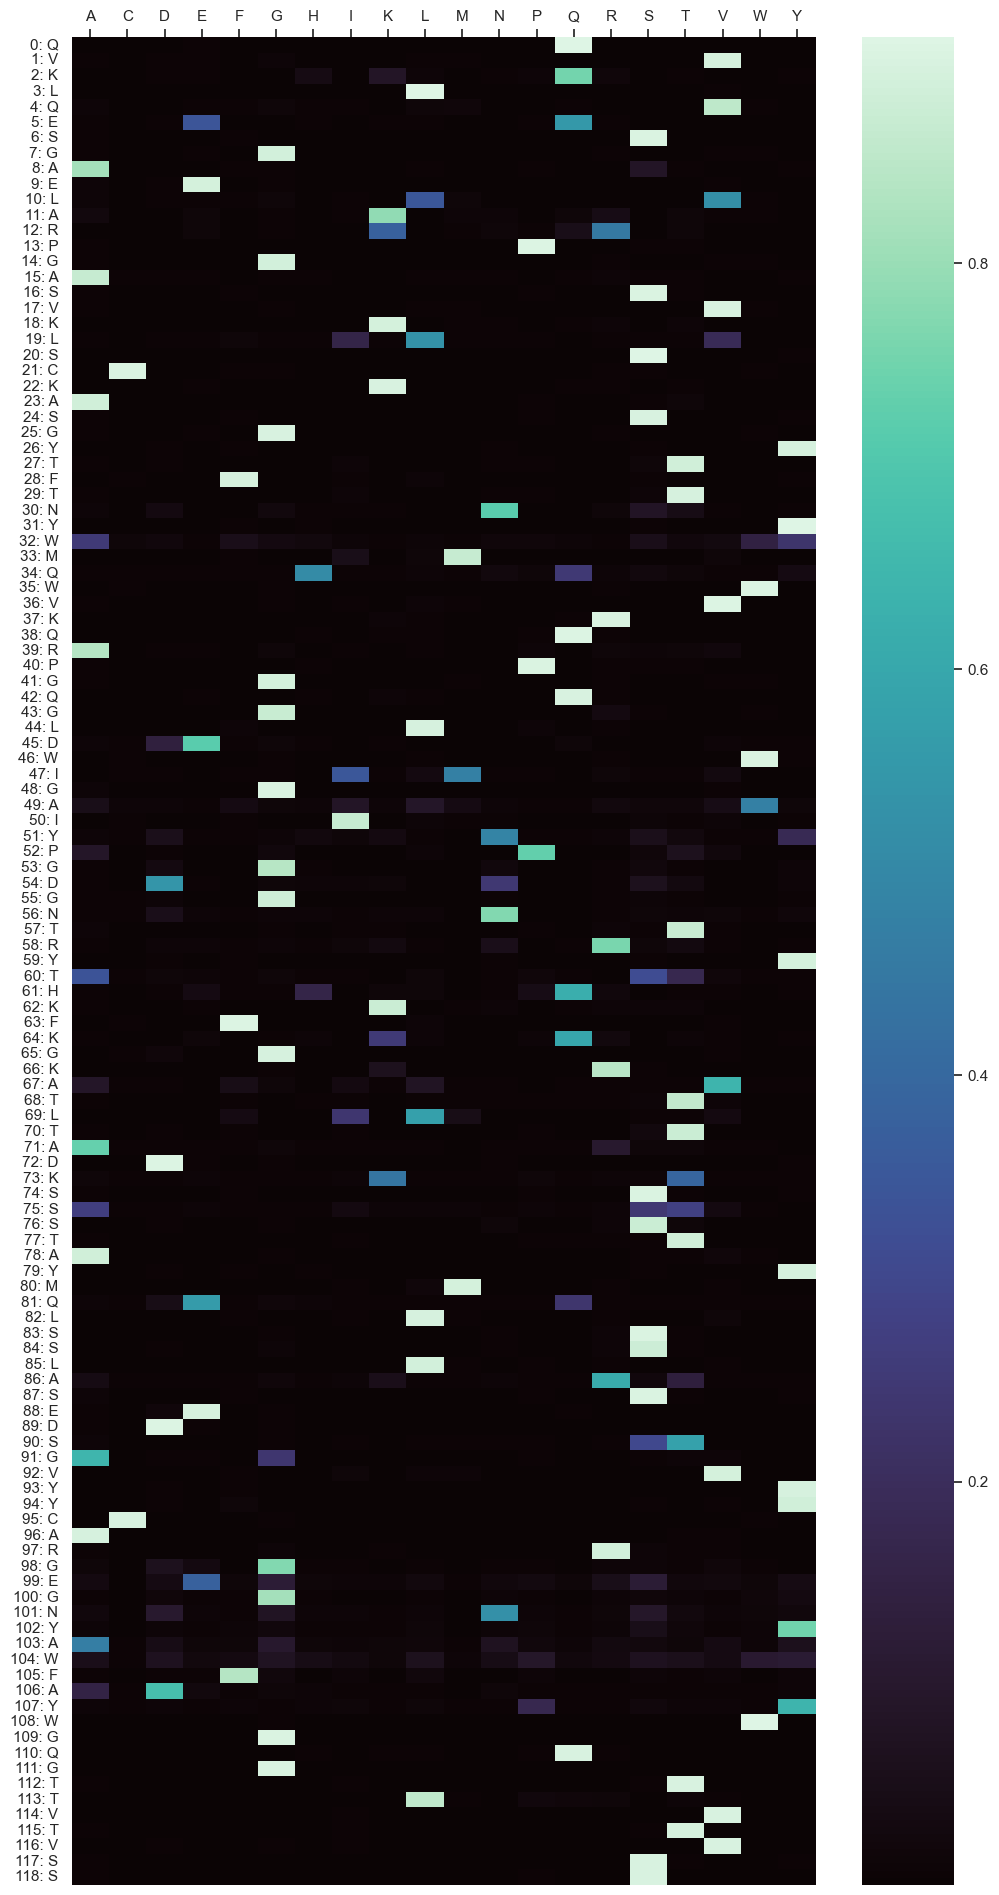

In [11]:
visualize_scores(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS',
    'H'
)

Show only the five most probable residues for each position:

In [12]:
def visualize_top_five(sequence, chain_type, offset=0, length=15):
    preds = sapiens.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(16, 3))
    sns.heatmap(numbers.iloc[offset:length + offset,:5].T, annot=annot.iloc[offset:length + offset,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Greens', cbar_kws={'label': 'Probability'});
    for i in range(length):
        ax.axvline(i, color='white', lw=5)
    ax.set_ylabel('Top predictions');
    ax.xaxis.tick_top()
    plt.xticks(rotation=0, fontsize=15);

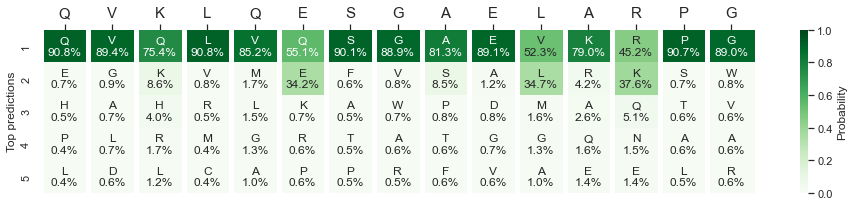

In [15]:
visualize_top_five(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

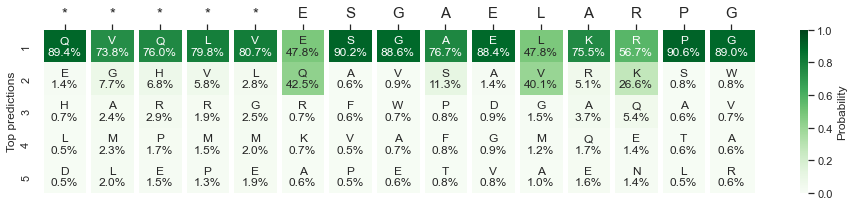

In [16]:
visualize_top_five(
    '*****ESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

In [19]:
def visualize_top_five_vertical(sequence, chain_type):
    preds = sapiens.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '   ' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(8, 35))
    sns.heatmap(numbers.iloc[:,:5], annot=annot.iloc[:,:5], fmt='s', ax=ax, robust=True, vmax=0.5, cmap='Greens');
    plt.yticks(rotation=0, fontsize=13);

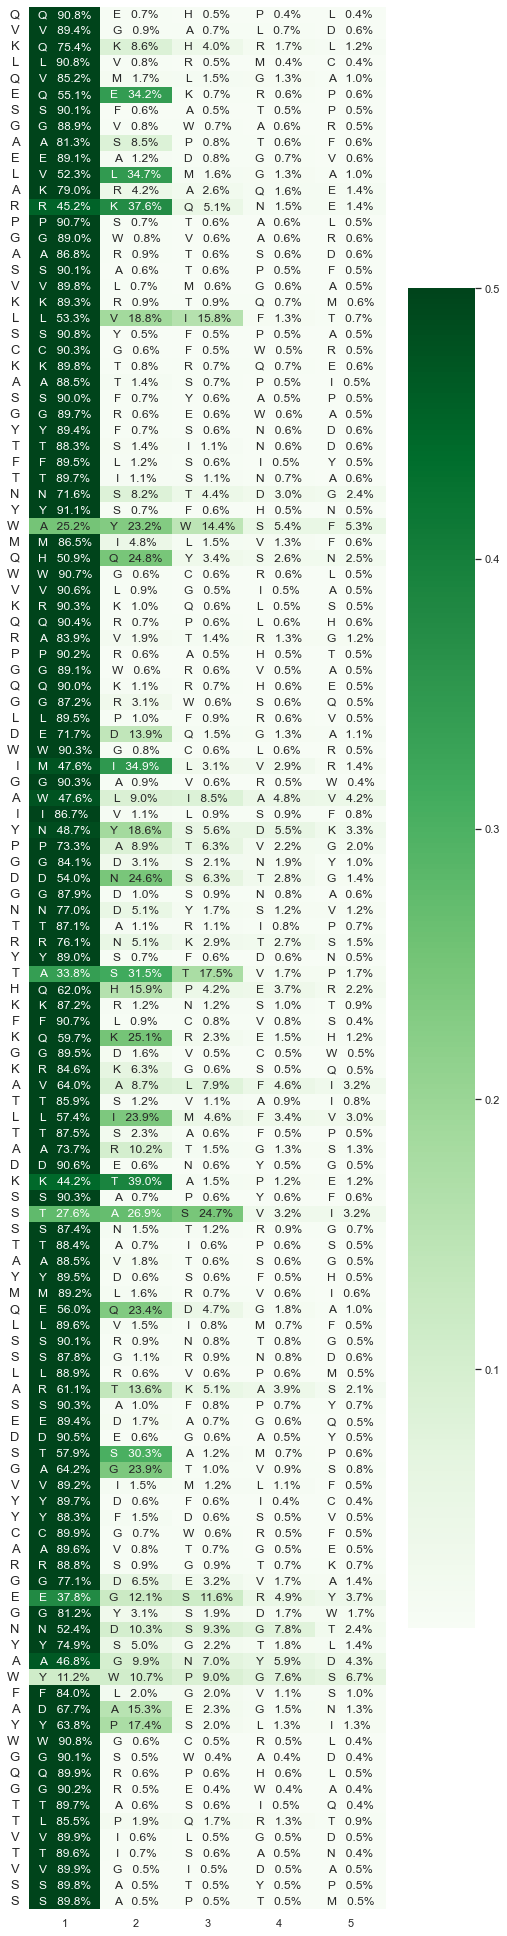

In [20]:
visualize_top_five_vertical(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H'
)

## Evaluating infill accuracy on TheraSAbDab

In [46]:
import sys
from os import path

In [47]:
!wget -O TheraSAbDab.csv http://opig.stats.ox.ac.uk/webapps/newsabdab/static/downloads/TheraSAbDab_SeqStruc_OnlineDownload.csv

--2022-02-02 10:09:48--  http://opig.stats.ox.ac.uk/webapps/newsabdab/static/downloads/TheraSAbDab_SeqStruc_OnlineDownload.csv
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.58
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372332 (364K) [text/csv]
Saving to: ‘TheraSAbDab.csv’

TheraSAbDab.csv     100%[===================>] 363,61K  2,34MB/s    in 0,2s    

2022-02-02 10:09:49 (2,34 MB/s) - ‘TheraSAbDab.csv’ saved [372332/372332]



In [48]:
thera = pd.read_csv("TheraSAbDab.csv")
thera.head()

,Therapeutic,Format,CH1 Isotype,VD LC,Highest_Clin_Trial (Oct '21),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),...,Year Proposed,Year Recommended,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes,Unnamed: 22
0,Abagovomab,Whole mAb,G1,Kappa,Phase-III,Discontinued,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,na,na,...,2006,2007,CA125,Menarini,na,na,Ovarian cancer;Pancreatic cancer,na,NaN,NaN
1,Abciximab,Fab,G1,Kappa,Approved,NFD,EVQLQQSGTVLARPGASVKMSCEASGYTFTNYWMHWVKQRPGQGLE...,EIVLTQSPVTLSVTPGDSVSLSCRASRDISNNLHWFQQTSHESPRL...,na,na,...,1993,1994,CD41_CD61,Janssen Biologics BV;Eli Lilly,Coronary artery restenosis;Unstable angina pec...,na,Arterial occlusive disorders;Myocardial infarc...,na,Sequence sourced through DrugBank. Thanks to H...,NaN
2,Abelacimab,Whole mAb,G1,Lambda,Phase-II,Active,QVQLLESGGGLVQPGGSLRLSCAASGFTFSTAAMSWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNDVSWYQQLPGTAPK...,na,na,...,2018,2019,F11,Novartis,na,Venous Thromboembolism; Stroke;Thrombosis,na,na,NaN,NaN
3,Abituzumab,Whole mAb,G2,Kappa,Phase-II,Active,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,na,na,...,2013,2014,ITGAV,Merck,na,Colorectal cancer;Systemic scleroderma,Ovarian cancer;Prostate cancer;Solid tumours,na,"4o02 claims to be abituzumab (17E6), but is not",NaN
4,Abrezekimab,Fab,G1,Kappa,Phase-I,Discontinued,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,na,na,...,2017,2018,IL13,UCB,na,na,Asthma,na,NaN,NaN


In [49]:
def infill_sequence_pos(positions, sequence, chain_type):
    """Mask the residues given by positions and perform infilling."""
    list_seq = list(sequence)
    for pos in positions:
        list_seq[pos] = "*"
    query_seq = "".join(list_seq)
    return predict_masked(query_seq, chain_type)

In [50]:
def get_mean_infill_accuracy(sequence, chain_type):
    """Mask each position in the sequence individually and return the accuracy of infilling the original residue."""
    correct = 0
    for i in range(len(sequence)):
        filled = infill_sequence_pos([i], sequence, chain_type)
        if filled == sequence:
            correct += 1
    return correct / len(sequence)

In [51]:
get_mean_infill_accuracy(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H"
)

0.6218487394957983

In [52]:
def suffix_class(name):
    if name.endswith("zumab"):
        return "zumab"
    if name.endswith("umab"):
        return "umab"
    if name.endswith("imab"):
        return "imab"
    return None

In [53]:
thera["suffix"] = thera["Therapeutic"].apply(suffix_class)

In [54]:
%%time

# Apply infilling to each heavy sequence and get average accuracy
thera["Accuracy heavy"] = thera["Heavy Sequence"].apply(lambda x: get_mean_infill_accuracy(x, "H"))

CPU times: user 14min 55s, sys: 1min 12s, total: 16min 8s
Wall time: 14min


In [55]:
thera.head()

,Therapeutic,Format,CH1 Isotype,VD LC,Highest_Clin_Trial (Oct '21),Est. Status,Heavy Sequence,Light Sequence,Heavy Sequence (if bispec),Light Sequence (if bispec),...,Target,Companies,Conditions Approved,Conditions Active,Conditions Discontinued,Development Tech,Notes,Unnamed: 22,suffix,Accuracy heavy
0,Abagovomab,Whole mAb,G1,Kappa,Phase-III,Discontinued,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,na,na,...,CA125,Menarini,na,na,Ovarian cancer;Pancreatic cancer,na,NaN,NaN,None,0.621849
1,Abciximab,Fab,G1,Kappa,Approved,NFD,EVQLQQSGTVLARPGASVKMSCEASGYTFTNYWMHWVKQRPGQGLE...,EIVLTQSPVTLSVTPGDSVSLSCRASRDISNNLHWFQQTSHESPRL...,na,na,...,CD41_CD61,Janssen Biologics BV;Eli Lilly,Coronary artery restenosis;Unstable angina pec...,na,Arterial occlusive disorders;Myocardial infarc...,na,Sequence sourced through DrugBank. Thanks to H...,NaN,imab,0.627119
2,Abelacimab,Whole mAb,G1,Lambda,Phase-II,Active,QVQLLESGGGLVQPGGSLRLSCAASGFTFSTAAMSWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNDVSWYQQLPGTAPK...,na,na,...,F11,Novartis,na,Venous Thromboembolism; Stroke;Thrombosis,na,na,NaN,NaN,imab,0.833333
3,Abituzumab,Whole mAb,G2,Kappa,Phase-II,Active,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,na,na,...,ITGAV,Merck,na,Colorectal cancer;Systemic scleroderma,Ovarian cancer;Prostate cancer;Solid tumours,na,"4o02 claims to be abituzumab (17E6), but is not",NaN,zumab,0.737288
4,Abrezekimab,Fab,G1,Kappa,Phase-I,Discontinued,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,na,na,...,IL13,UCB,na,na,Asthma,na,NaN,NaN,imab,0.711864


In [56]:
# Accuracies of infilling by antibody suffix
thera.groupby("suffix").mean()["Accuracy heavy"]

suffix
imab     0.801706
umab     0.894173
zumab    0.789134
Name: Accuracy heavy, dtype: float64

In [57]:
%%time

# Repeat for light sequences
thera["Accuracy light"] = thera["Light Sequence"].apply(lambda x: get_mean_infill_accuracy(x, "L"))

CPU times: user 13min, sys: 1min 5s, total: 14min 6s
Wall time: 12min 22s


In [58]:
thera.groupby("suffix").mean()["Accuracy light"]

suffix
imab     0.816544
umab     0.939837
zumab    0.799526
Name: Accuracy light, dtype: float64